In [229]:
import pandas as pd
import numpy as np
import os
import glob
import duckdb as db
import matplotlib.pyplot as plt

from helpers import load_full_df, delete_columns

import textblob as tx
from nltk.sentiment import SentimentIntensityAnalyzer
from langdetect import detect

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

CSV_DIR_STRING = 'data/csv_files/'
JSON_DIR_STRING = 'data/json_files/'
TARGET_COL_NAME = 'label'

In [302]:
def replacer(review: str) -> str:

    replace = {
                'á': 'a', 
                'é': 'e',
                'ớ': 'o',
                'ú': 'u',
                'Á': 'A',
                'É': 'E',
                'Ớ': 'O',
                'Ú': 'U'
            }
    
    for key in replace.keys():
        review = str(review).replace(key, replace[key])
    
    return review

def mx(x):

    if x == 'de':
        x = 3
    elif x == 'fr':
        x = 2
    elif x == 'en':
        x = 1
    else:
        x = np.random.randint(1, 3)
        
    return x

In [303]:
def preprocess(df, is_train=True):

    if is_train:
        df['vine'] = df['vine'].apply(lambda x: True if x == 'Y' else False)
        df['verified_purchase'] = df['verified_purchase'].apply(lambda x: True if x == 'Y' else False)
        df['review_date'] = df['review_date'].astype(str)

        
        df.set_index('Unnamed: 0', drop=True, inplace=True)
        df.index.name = ''

        df['review_body'] = df.apply(lambda x: replacer(x['review_body']) if x['marketplace_id'] != 2 else x['review_body'], axis=1)
        df['review_headline'] = df.apply(lambda x: replacer(x['review_headline']) if x['marketplace_id'] != 2 else x['review_headline'], axis=1)

        df['lens'] = df['review_body'].apply(lambda x: len(x))
        df = df[df['lens'] >= 5]

        # df['stars'] = df['review_body'].apply(lambda x: int(pipeline(x[0:512])[0]['label'][0]))

        df = df[~df["review_body"].str.contains('https://')]
        df['marketplace_id'] = df.apply(lambda x: detect(x['review_body']) if x['marketplace_id'] == 0 else x['marketplace_id'], axis=1)
        df = df[~df["marketplace_id"].isin(['pt', 'sv', 'pl', 'nl', 'da', 'et', 'it', 'so', 'ca', 'af', 'fi', 'tl', 'sl', 'ro', 'sw', 'no', 'id'])]

        df['marketplace_id'] = df['marketplace_id'].apply(lambda x: mx(x))
        df['marketplace_id'] = df['marketplace_id'].astype(int)
    else:
        df['vine'] = df['vine'].apply(lambda x: True if x == 'Y' else False)
        df['verified_purchase'] = df['verified_purchase'].apply(lambda x: True if x == 'Y' else False)
        df['review_date'] = df['review_date'].astype(str)

        
        df.set_index('Unnamed: 0', drop=True, inplace=True)
        df.index.name = ''

        df['review_body'] = df.apply(lambda x: replacer(x['review_body']) if x['marketplace_id'] != 2 else x['review_body'], axis=1)
        df['review_headline'] = df.apply(lambda x: replacer(x['review_headline']) if x['marketplace_id'] != 2 else x['review_headline'], axis=1)

        df['lens'] = df['review_body'].apply(lambda x: len(x))
        # df = df[df['lens'] >= 5]

        # df['stars'] = df['review_body'].apply(lambda x: int(pipeline(x[0:512])[0]['label'][0]))

        df = df[~df["review_body"].str.contains('https://')]
        df['marketplace_id'] = df.apply(lambda x: detect(x['review_body']) if x['marketplace_id'] == 0 else x['marketplace_id'], axis=1)
        # df = df[~df["marketplace_id"].isin(['pt', 'sv', 'pl', 'nl', 'da', 'et', 'it', 'so', 'ca', 'af', 'fi', 'tl', 'sl', 'ro', 'sw', 'no', 'id'])]

        df['marketplace_id'] = df['marketplace_id'].apply(lambda x: mx(x))
        # df['marketplace_id'] = df['marketplace_id'].astype(int)

    return df

In [251]:
df = load_full_df(CSV_DIR_STRING, JSON_DIR_STRING, load_json=False)

In [252]:
df = preprocess(df)

In [319]:
df.head()

,product_id,product_parent,product_title,vine,verified_purchase,review_headline,review_body,review_date,marketplace_id,product_category_id,label,lens
,,,,,,,,,,,,
9,B001N2MZT8,903886718,Green Zone [DVD],False,True,green zone,I found at first it was a little difficult to ...,2010-11-15,1,3,False,450
11,B00GCBVE0Q,282740618,Le secret de Green Knowe,False,True,NaN,J'ai aimé cette histoire. Les acteurs - et sur...,2014-11-23,2,3,False,153
19,1423165691,883799517,A Disney Sketchbook.,False,False,okay mais...,est-ce une coincidence que la plupart des prin...,2012-12-22,2,0,False,246
33,0061091480,623343977,Your Erroneous Zones,False,False,Arrogant,Wayne Dyer is a popular american personal grow...,2009-07-21,1,0,True,325
34,B00HZ4CYOY,647510225,König der Mathematik Junior,False,True,Tolle Mathe App...,.....unsere Kids mögen diese Art des Lernens. ...,2015-06-01,3,1,False,156


In [185]:
import missingno as mso

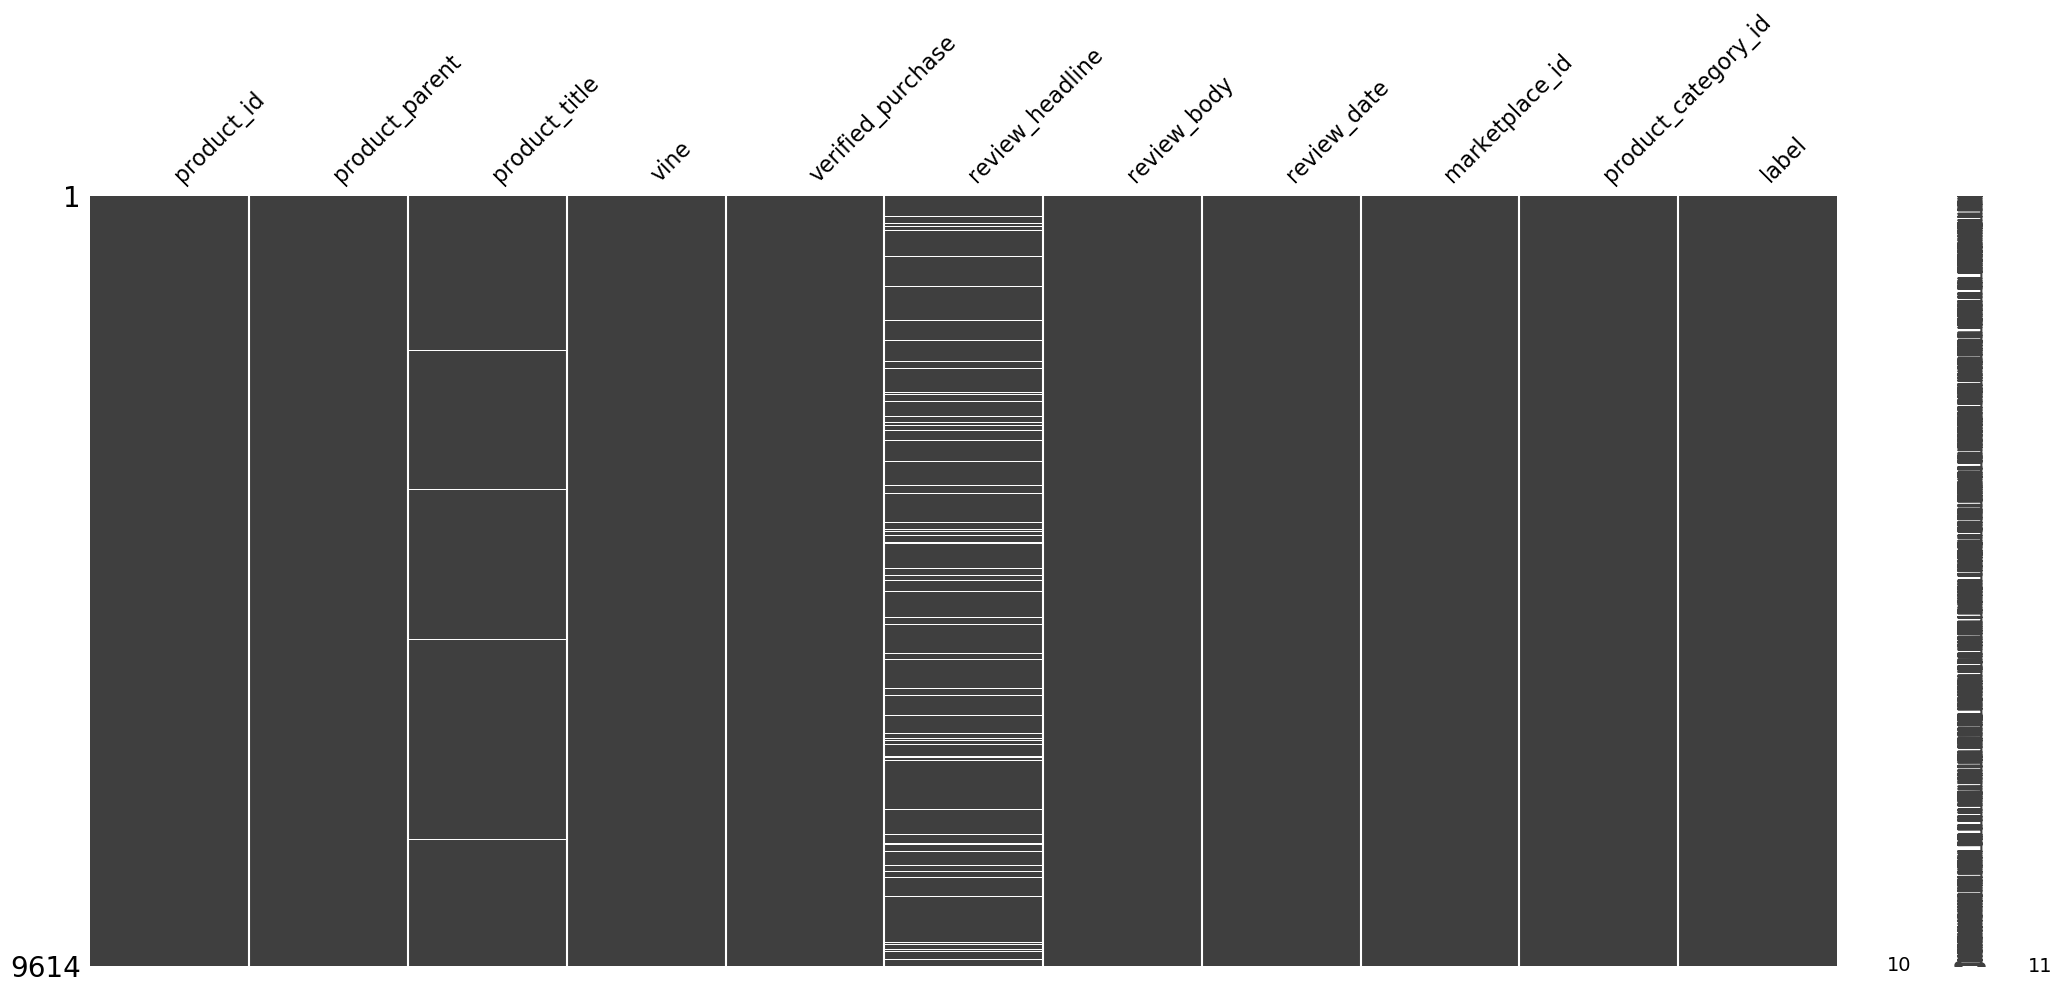

In [186]:
mso.matrix(df)
plt.show()

In [214]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# from transformers import TextClassificationPipeline

# tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Downloading: 100%|██████████| 39.0/39.0 [00:00<00:00, 13.0kB/s]
Downloading: 100%|██████████| 953/953 [00:00<00:00, 105kB/s]
Downloading: 100%|██████████| 851k/851k [00:00<00:00, 1.42MB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 11.2kB/s]
Downloading: 100%|██████████| 638M/638M [01:00<00:00, 11.0MB/s] 


In [219]:
# pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer)

In [ ]:
# df['stars'] = df['review_body'].apply(lambda x: int(pipeline(x[0:512])[0]['label'][0]))

In [189]:
# sia = SentimentIntensityAnalyzer()
# df['review_sentiment'] = df['review_body'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [83]:
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading: 100%|██████████| 1.18k/1.18k [00:00<00:00, 235kB/s]
Downloading: 100%|██████████| 10.2k/10.2k [00:00<00:00, 1.09MB/s]
Downloading: 100%|██████████| 116/116 [00:00<00:00, 12.9kB/s]
Downloading: 100%|██████████| 39.3k/39.3k [00:00<00:00, 398kB/s]
Downloading: 100%|██████████| 349/349 [00:00<00:00, 58.7kB/s]
Downloading: 100%|██████████| 90.9M/90.9M [00:16<00:00, 5.52MB/s]
Downloading: 100%|██████████| 53.0/53.0 [00:00<00:00, 17.8kB/s]
Downloading: 100%|██████████| 112/112 [00:00<00:00, 28.1kB/s]
Downloading: 100%|██████████| 466k/466k [00:00<00:00, 901kB/s] 
Downloading: 100%|██████████| 350/350 [00:00<00:00, 50.0kB/s]
Downloading: 100%|██████████| 13.2k/13.2k [00:00<00:00, 2.63MB/s]
Downloading: 100%|██████████| 232k/232k [00:00<00:00, 243kB/s]
Downloading: 100%|██████████| 190/190 [00:00<00:00, 38.0kB/s]


In [84]:
# sentence_embeddings = model.encode(df['review_body'].iloc[0])

In [87]:
# df['review_body_embedding'] = df['review_body'].apply(lambda x: np.mean(model.encode(x)))

C:\Users\timod\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
# df['review_body_embedding'] = df['review_body_embedding'].apply(lambda x: np.mean(x))

C:\Users\timod\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [254]:
qad_df = df.copy()
delete_columns(qad_df, columns_to_delete=['product_id', 'product_title', 'vine', 'review_headline', 'review_body', 'review_date'])

In [256]:
y = qad_df.pop('label')
X = qad_df

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [354]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [431]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [3, 4, 5, 7],
        'learning_rate': [0.1, 0.01, 0.05],
        'n_estimators': [200, 1500],
        'bootstrap': [False, True],

        }

In [432]:
clf = XGBClassifier(learning_rate=0.002, n_estimators=1000, objective='binary:logistic',
                    silent=True, nthread=-1)

# clf = RandomForestClassifier()

folds = 3
param_comb = 20

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=skf.split(X,y), verbose=3, random_state=1001)
random_search.fit(X, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.1min finished
C:\Users\timod\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "bootstrap", "max_features", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000024D54843CC8>,
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.002,
                                           max_delta_step=None,...
                   param_distributions={'bootstrap': [False, True],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                 

In [433]:
y_pred = random_search.predict(X_test)

In [434]:
accuracy_score(y_test, y_pred)

0.7642018406854967

In [435]:
test_df = pd.read_csv('test_hidden.csv')
validation_df = pd.read_csv('validation_hidden.csv')

In [436]:
test_df = preprocess(test_df, is_train=False)

In [437]:
validation_df = preprocess(validation_df, is_train=False)

In [438]:
COLUMNS = qad_df.columns.tolist()

In [439]:
test_df = test_df[COLUMNS]

In [440]:
validation_df = validation_df[COLUMNS]

In [441]:
y_pred_test = random_search.predict(test_df)

In [442]:
y_pred_val = random_search.predict(validation_df)

In [443]:
y_pred_test = y_pred_test.astype(str)
y_pred_val = y_pred_val.astype(str)

In [444]:
np.savetxt("quick_and_dirty_test2.txt", y_pred_test, delimiter=",", fmt='%s')
np.savetxt("quick_and_dirty_val2.txt", y_pred_val, delimiter=",", fmt='%s')